In [1]:
import os
import glob
import pandas as pd
import numpy as np 

folder = r"C:\Users\Shruti_Kakade\Downloads\OneDrive_1_3-1-2023"

In [2]:
## Aggregate the billing files for 2022 only

In [3]:
files = os.listdir(folder)

for file in files:
    if file.endswith('.xlsb'):
        df = pd.read_excel(os.path.join(folder,file), engine='pyxlsb')

In [4]:
df.count()

Posting date                         30
Contract Account                 167874
Start Billing Period             167932
End Billing Period               167933
Net Due Date                     167937
Total Energy Charges Billed      167937
Total Fixed Charges Billed       167937
Total PPCA Amount Billed         167937
Total E-Tax Billed               167937
Total Pension Trust Surcharge    167937
Total Subsidy Billed             167937
Total Surcharge of 8%            167937
Actual KWH                       167937
Amount Payable                   167937
Current Demand                   167937
dtype: int64

In [5]:
df.head(2)

,Posting date,Contract Account,Start Billing Period,End Billing Period,Net Due Date,Total Energy Charges Billed,Total Fixed Charges Billed,Total PPCA Amount Billed,Total E-Tax Billed,Total Pension Trust Surcharge,Total Subsidy Billed,Total Surcharge of 8%,Actual KWH,Amount Payable,Current Demand
0,01.09.2022,6.000001e+10,02.08.2022,01.09.2022,16.09.2022,66817.0,20020.0,16659.65,4249.08,6078.59,0.0,6946.96,8690,120770.0,120771.28
1,NaN,6.000004e+10,02.08.2022,01.09.2022,19.09.2022,14377.0,1101.1,2969.57,914.28,1083.47,0.0,1238.25,2135,21700.0,21683.67


In [6]:
## For each customer (Contract Account), calculate the number of billing days for each bill 
## (start billing period – end billing period + 1) and the number of billing days for the year

In [7]:
df['Number_of_bi_days'] = pd.to_datetime(df['End Billing Period']) - pd.to_datetime(df['Start Billing Period']) 

In [8]:
df['Number_of_bi_days'] = df['Number_of_bi_days'] + np.timedelta64(1, 'D')

In [9]:
billing_days_per_account = df.groupby('Contract Account')['Number_of_bi_days'].sum().reset_index()

In [10]:
billing_days_per_account

,Contract Account,Number_of_bi_days
0,6.000001e+10,236 days
1,6.000001e+10,-29 days
2,6.000002e+10,236 days
3,6.000002e+10,236 days
4,6.000002e+10,236 days
...,...,...
166570,6.002991e+10,32 days
166571,6.002991e+10,-29 days
166572,6.002992e+10,31 days
166573,6.002992e+10,235 days


In [11]:
sum(billing_days_per_account['Number_of_bi_days'].values)

numpy.timedelta64(-935599653062377472,'ns')

In [12]:
## For each customer, sum the billed consumption (Actual KWH) for all the bills for the year

In [13]:
billed_consumption = df.groupby('Contract Account')['Actual KWH'].sum().reset_index()

In [14]:
billed_consumption

,Contract Account,Actual KWH
0,6.000001e+10,11460
1,6.000001e+10,8690
2,6.000002e+10,0
3,6.000002e+10,3333
4,6.000002e+10,80028
...,...,...
166570,6.002991e+10,336
166571,6.002991e+10,1579
166572,6.002992e+10,600
166573,6.002992e+10,310


In [15]:
## Divide the total consumption by the number of billing days to obtain the customer’s average daily consumption

In [16]:
int_days = billing_days_per_account['Number_of_bi_days'].astype('timedelta64[D]')

In [17]:
Avg_daily_consumption = billed_consumption['Actual KWH'] / int_days

In [18]:
Avg_daily_consumption

0          48.559322
1        -299.655172
2           0.000000
3          14.122881
4         339.101695
             ...    
166570     10.500000
166571    -54.448276
166572     19.354839
166573      1.319149
166574     37.233333
Length: 166575, dtype: float64

In [19]:
## Collapse the data to the customer level and plot a histogram of the average daily consumption

In [20]:
billed_consumption['Avg_daily_consumption'] = Avg_daily_consumption

<AxesSubplot:>

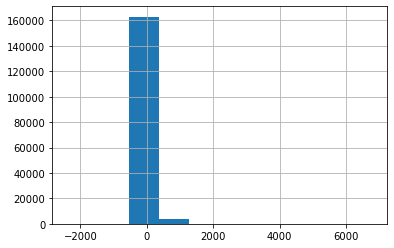

In [21]:
billed_consumption['Avg_daily_consumption'].hist()

In [22]:
## Indicate the 25th, 50th and 75th percentiles of the distribution in the histogram using vertical lines

In [23]:
np.percentile(Avg_daily_consumption, 25)

2.4838709677419355

In [24]:
np.percentile(Avg_daily_consumption, 50)

9.797752808988765

In [25]:
np.percentile(Avg_daily_consumption, 75)

21.5

In [26]:
billed_consumption['Avg_daily_consumption'].describe()

count    166575.000000
mean         36.097288
std         113.916283
min       -2381.379310
25%           2.483871
50%           9.797753
75%          21.500000
max        6780.000000
Name: Avg_daily_consumption, dtype: float64

In [27]:
np.percentile(Avg_daily_consumption, 99)

529.1300000000047

In [28]:
df_avg = billed_consumption[np.logical_and(billed_consumption['Avg_daily_consumption'] < np.percentile(Avg_daily_consumption, 99), 
billed_consumption['Avg_daily_consumption'] > np.percentile(Avg_daily_consumption, 1))]


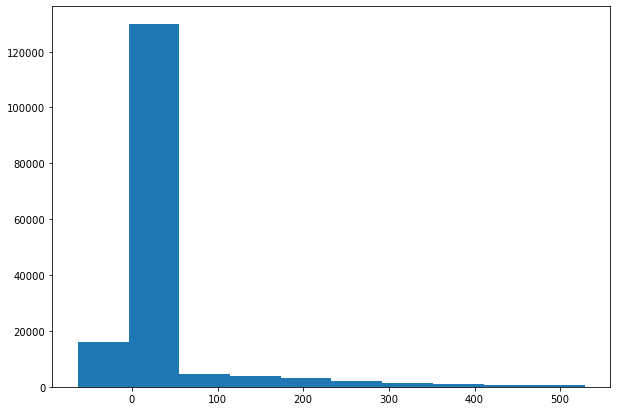

In [45]:
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
a = np.array(df_avg['Avg_daily_consumption'].values)

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a)

# Show plot
plt.show()



In [30]:
df_avg

,Contract Account,Actual KWH,Avg_daily_consumption
0,6.000001e+10,11460,48.559322
2,6.000002e+10,0,0.000000
3,6.000002e+10,3333,14.122881
4,6.000002e+10,80028,339.101695
5,6.000003e+10,1284,38.909091
...,...,...,...
166570,6.002991e+10,336,10.500000
166571,6.002991e+10,1579,-54.448276
166572,6.002992e+10,600,19.354839
166573,6.002992e+10,310,1.319149


In [31]:
q1_df = df_avg[np.logical_and(df_avg['Avg_daily_consumption'] > np.percentile(Avg_daily_consumption, 0), 
                              df_avg['Avg_daily_consumption'] < np.percentile(Avg_daily_consumption, 25))]

q2_df = df_avg[np.logical_and(df_avg['Avg_daily_consumption'] > np.percentile(Avg_daily_consumption, 25), 
                              df_avg['Avg_daily_consumption'] < np.percentile(Avg_daily_consumption, 50))]

q3_df = df_avg[np.logical_and(df_avg['Avg_daily_consumption'] > np.percentile(Avg_daily_consumption, 50), 
                              df_avg['Avg_daily_consumption'] < np.percentile(Avg_daily_consumption, 75))]

q4_df = df_avg[np.logical_and(df_avg['Avg_daily_consumption'] > np.percentile(Avg_daily_consumption, 75), 
                              df_avg['Avg_daily_consumption'] < np.percentile(Avg_daily_consumption, 100))]
                              
                              
                              


In [50]:
import random
random_CA = df_avg['Contract Account'].values